In [23]:
%reload_ext autoreload
%autoreload 2


import pandas as pd
from src.nuclei.anneal import BaseAnneal
from src.nuclei.nucleus import BaseNucleus1B, BaseNucleus
from src.nuclei.losses import CrossEntropy, MAE
from src.nuclei.activations import Sigmoid, Binary, Relu

In [34]:
stimuli = {
    'x': [[0, 0], [0, 1], [1, 0], [1, 1]],
    # 'y': [0, 0, 0, 1]  # AND
    # 'y': [0, 1, 1, 1]  # OR
    'y': [0, 1, 1, 0]  # XOR,
}

# XOR [-2, -1, -1, 1, 9, 0, 1, 0, 9]
# AND [1, 0, 0, 0, 9, 0, 0, 0, 9]
# OR [0, -1, -1, 1, 9, 0, 1, 0, 9]

In [49]:
n = BaseNucleus1B(input_size=2, lr=0.5, activation=Sigmoid())
temp = 2
anneal = BaseAnneal(n, temp, steps=500, epochs=5, loss_func=CrossEntropy())

Epoch: 1


training in epoch 1: 100%|██████████| 500/500 [00:00<00:00, 1073.58it/s]


Epoch training loss: 0.8267699600679036
Epoch: 2


training in epoch 2: 100%|██████████| 500/500 [00:00<00:00, 994.42it/s] 


Epoch training loss: 0.8259419200403753
Epoch: 3


training in epoch 3: 100%|██████████| 500/500 [00:00<00:00, 1010.70it/s]


Epoch training loss: 0.825939793375428
Epoch: 4


training in epoch 4: 100%|██████████| 500/500 [00:00<00:00, 759.13it/s]


Epoch training loss: 0.8259396406814019
Epoch: 5


training in epoch 5: 100%|██████████| 500/500 [00:00<00:00, 837.04it/s]


Epoch training loss: 0.8259394232186048


<Axes: >

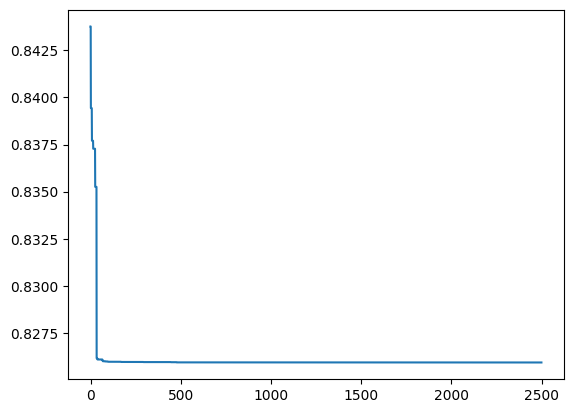

In [50]:
best, loss = anneal.stimulate(stimuli)
pd.Series(loss).plot()

In [51]:
best

[[2.22368866 0.95293612 0.75483744]
 [0.52486521 1.         0.39547104]
 [0.66231242 0.6069599  1.        ]]

In [52]:
best.project([0, 0]), best.project([0, 1]), best.project([1, 0]), best.project([1, 1])

(0.562184689558506,
 0.43779156377873185,
 0.4378468962935271,
 0.5621597735733849)